# Задание 2 
## Гришина Елена, вариант 28

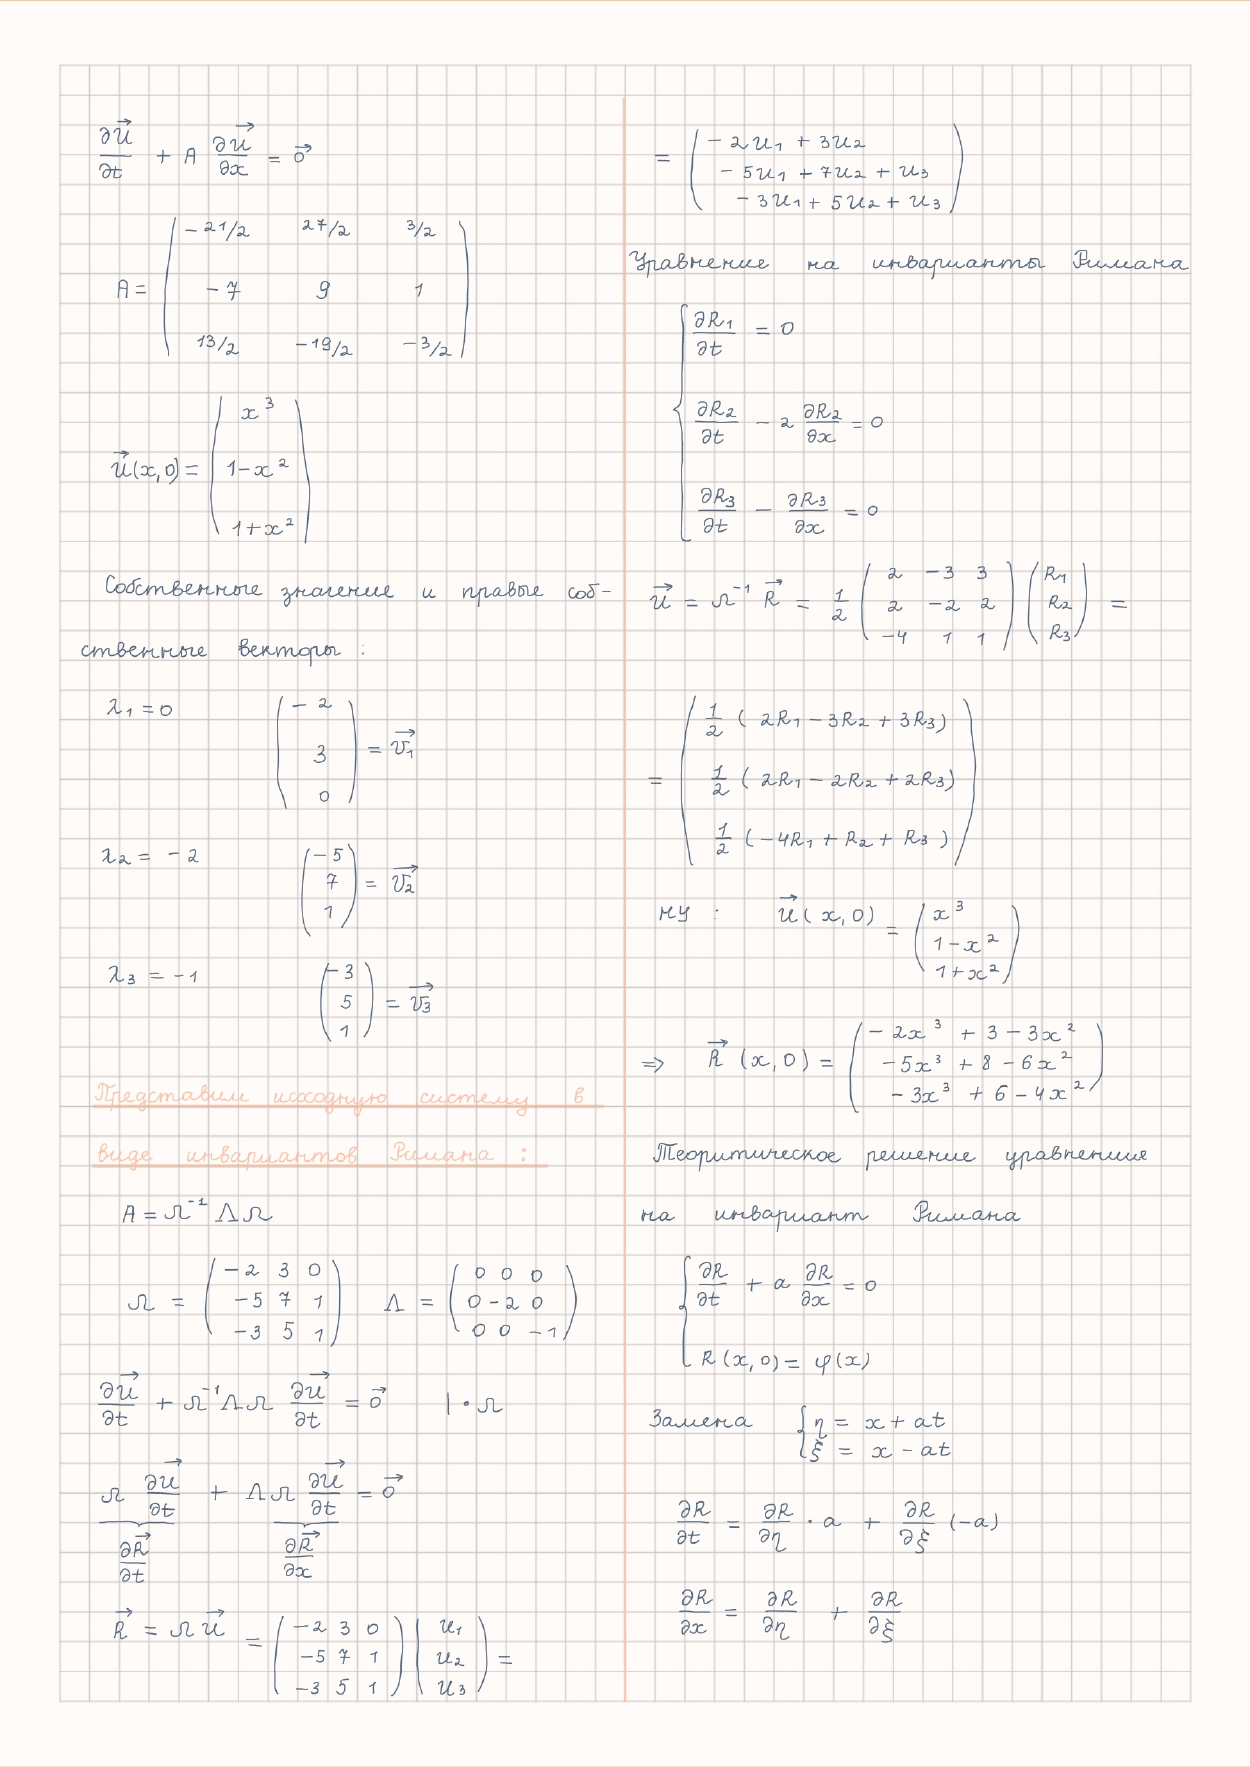

In [1]:
from IPython.display import Image
PATH = "/Users/Yelena/Downloads/"
Image(filename = PATH + "1.jpg", width=800, height=800)

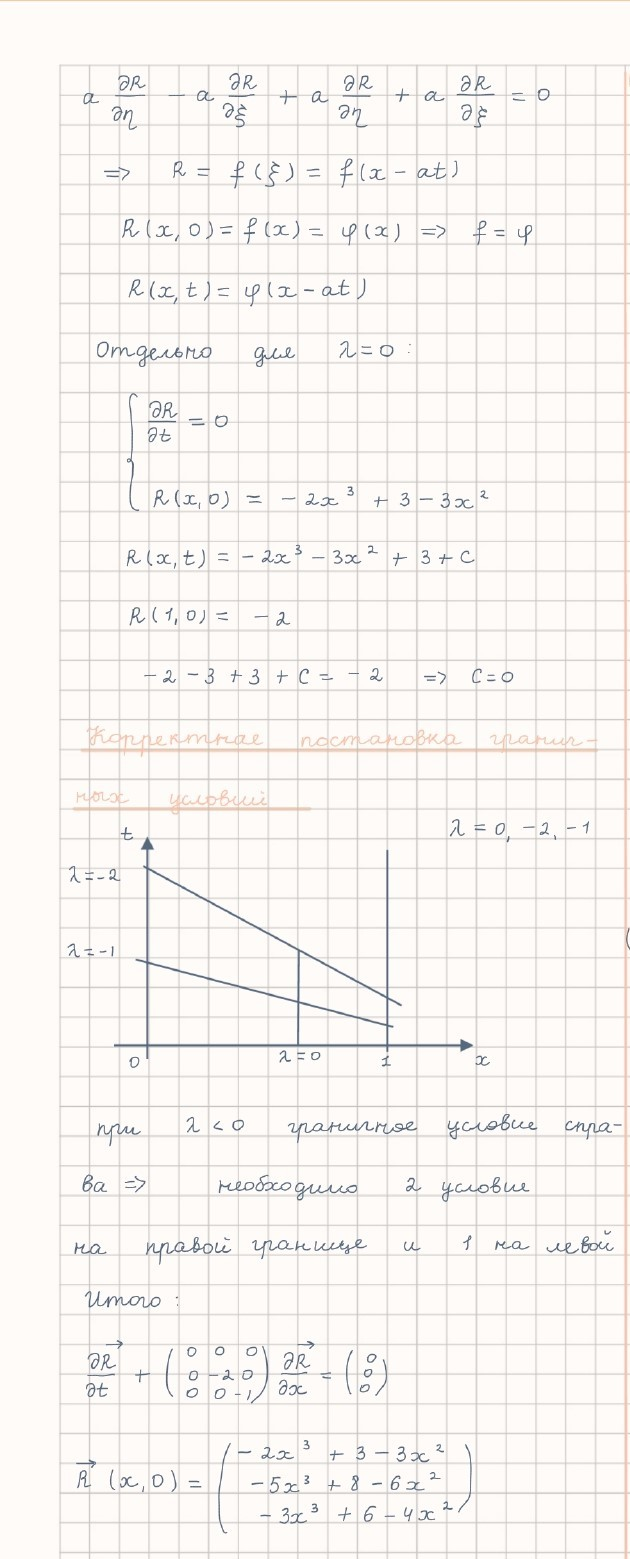

In [2]:
from IPython.display import Image
PATH = "/Users/Yelena/Desktop/"
Image(filename = PATH + "2.jpg", width=400, height=800)

In [3]:
import numpy as np
import scipy.linalg
import sympy
from sympy import *
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import axes
from scipy.optimize import curve_fit


In [4]:
#задаем матрицу
A = np.array([[-21/2, 27/2, 3/2],
            [-7, 9, 1],
            [13/2, -19/2, -3/2]])
L, T = 1, 1

In [5]:
#теоретическое решение
def R_th(x, t, a, R0):
    return R0(x-a*t)

In [6]:
#функция построения графиков с погрешностями
def plot_nev(x, t, u, s, a, R0):
    print('sigma = ', abs(a*tau/h))
    x_, t_ = np.meshgrid(x, t)
    fig = plt.figure(figsize = (24, 6))
    gs2 = gridspec.GridSpec(3, 3)
    
    ax = fig.add_subplot(gs2[:, :1], projection='3d')
    ax.plot_wireframe(x_,t_, u)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel(s)
    ax.set_title(s)
    ax.plot_surface(x_, t_, R_th(x_, t_, a, R0), color = "green", alpha = 0.5)
    
    ax1 = fig.add_subplot(gs2[:2, -2])
    ax1.plot(t, [max(abs(u[n]-R_th(x, n*tau, a, R0))) for n in range(len(t))])
    ax1.set_xlabel("t")
    ax1.set_ylabel("max$_x$|"+s+"-Rth|")
    ax1.set_title("Невязка по x")
    
    ax2= fig.add_subplot(gs2[:2, -1])
    ax2.plot(x, [max(abs(u[:, m]-R_th(h*m, t, a, R0))) for m in range(len(x))])
    ax2.set_xlabel("x")
    ax2.set_ylabel("max$_t$|"+s+"-Rth|")
    ax2.set_title("Невязка по t")
    plt.show()

# Реализация схемы Ландау-Меймана-Халатникова


Проанализируем схему Ландау (ЛМХ). Определим монотонность схемы, порядок аппроксимации и устойчивость.

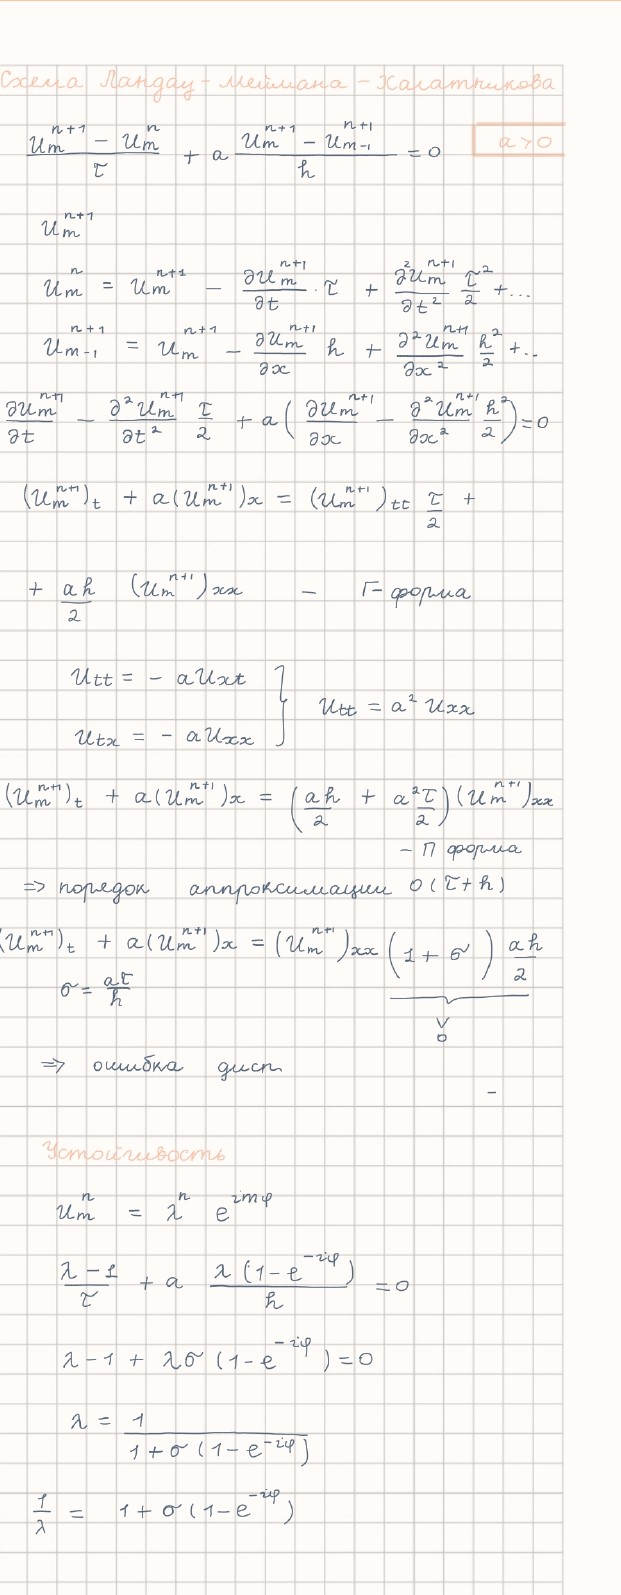

In [7]:
from IPython.display import Image
PATH = "/Users/Yelena/Desktop/"
Image(filename = PATH + "5.jpg", width=400, height=800)

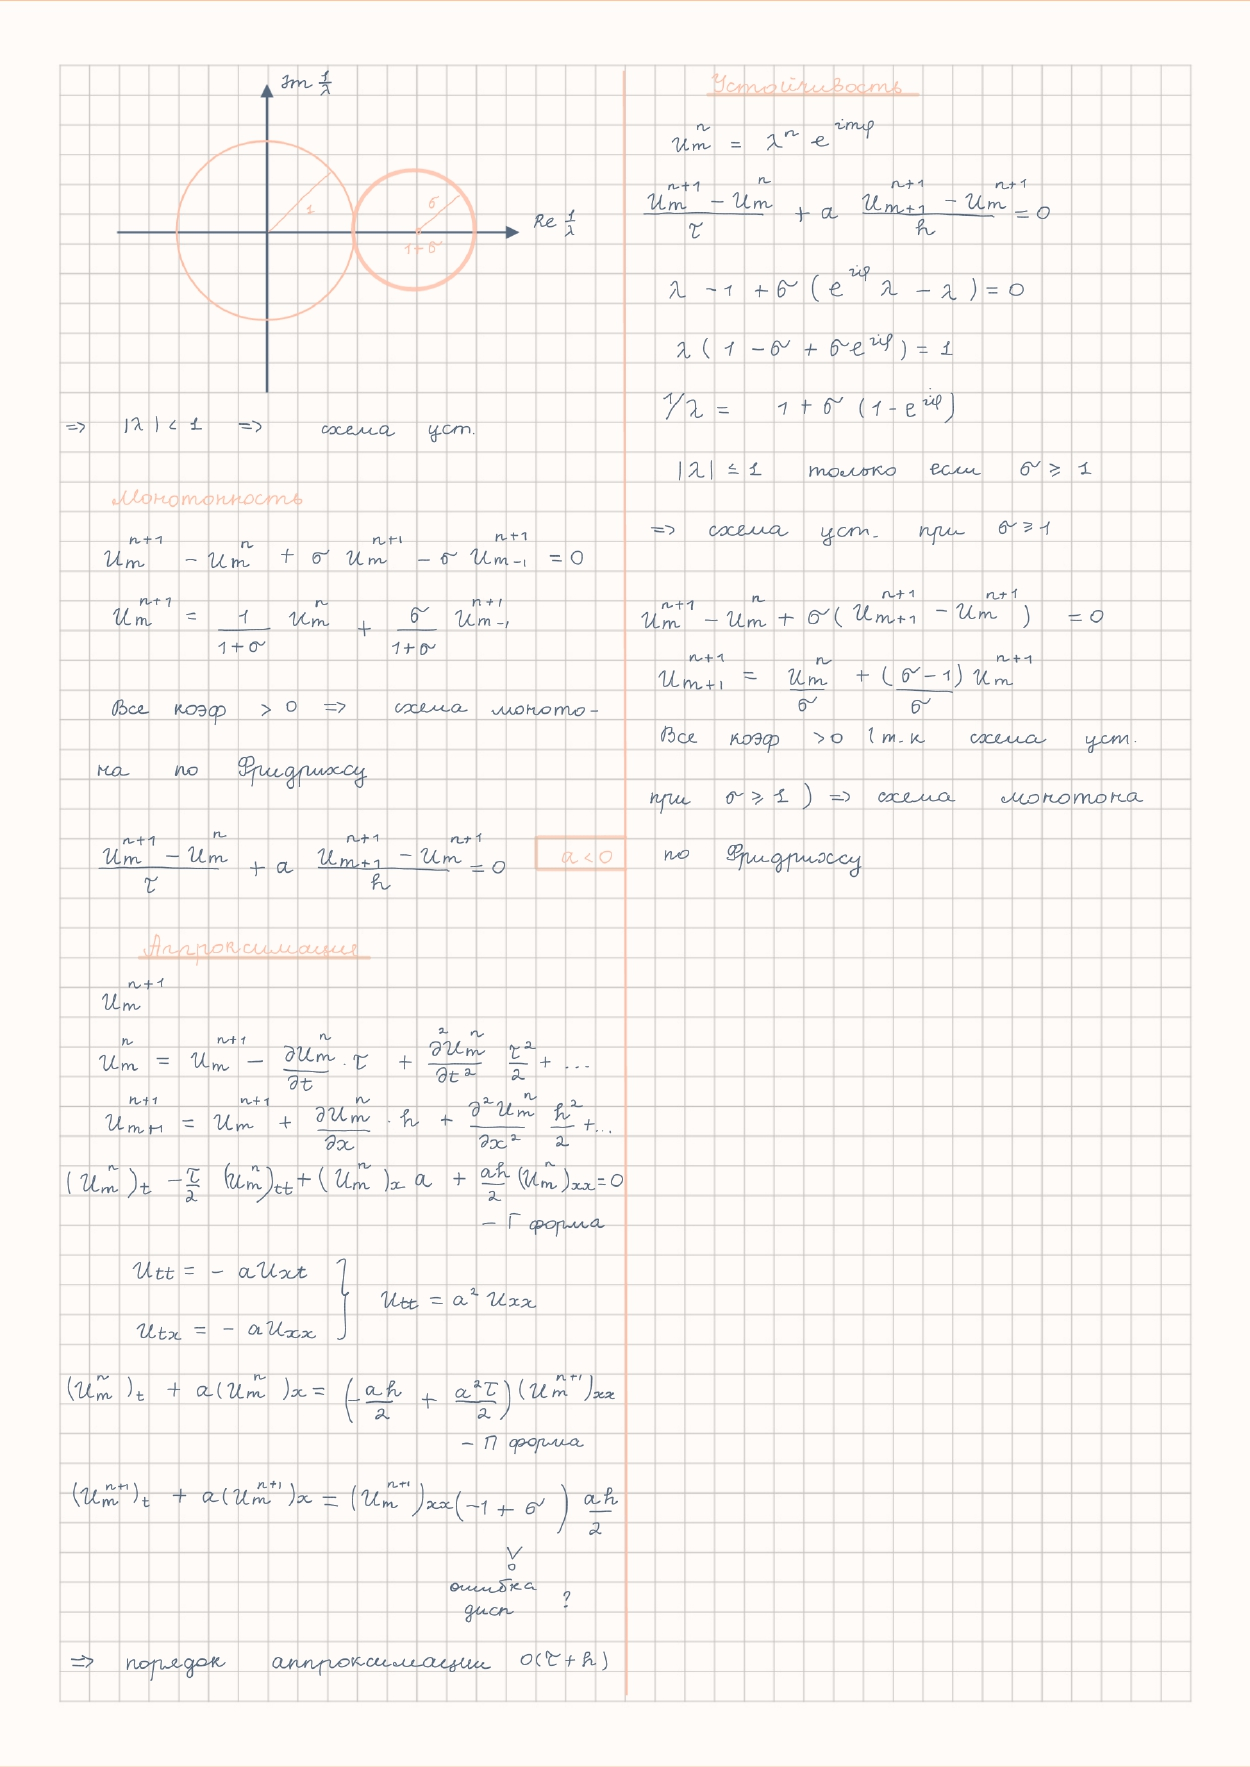

In [8]:
from IPython.display import Image
PATH = "/Users/Yelena/Downloads/"
Image(filename = PATH + "3.jpg", width=800, height=800)

Таким образом, установлено что ( при исследовании схемы см. выше):

1) Схема имеет первый порядок аппроксимации (подтверждается ПДП). Дисперсионная ошибка преобладает над диссипативой.

2) Схема безусловна устойчива.

3) Схема монотонна.

In [9]:
#функция численного решения по схеме ЛМХ

def Landau(a, R0, h, tau):
    sigma= (a*tau/h)
    M, N=int(L/h)+1, int(T/tau)+1
    R = np.zeros(M*N).reshape(N, M)
    R[0, :] = np.array([R0(x) for x in np.arange(0, L+h, h)]).copy()
    
    for n in range(0, N-1):
        if a>0:
            R[0, :] = np.array([R0(-a*n*tau) for n in np.arange(N)]).copy()
            for m in range(1, M-1):
                R[n+1, m] =R[n+1, m-1]*(sigma)/(1+sigma)+ R[n, m]/(1+sigma)
        if a==0:
            for m in range(1, M-1):
                R[n+1, m] = R[n, m]
            
        else:
            R[:, M-1] = np.array([R0(1-a*n*tau) for n in range(N)]).copy()
            for m in range(M-2, -1, -1):
                R[n+1, m] =  R[n, m-1]*(-1/sigma) + R[n+1, m-1]*(1+ sigma)/sigma
    return R 

In [10]:
#начальные условия инвариантов Римана
R01 = lambda x: -2*x**3-3*x**2+3
R02 = lambda x: -5*x**3-6*x**2+8
R03 = lambda x: -3*x**3-4*x**2+6

#### Подбор параметров сетки

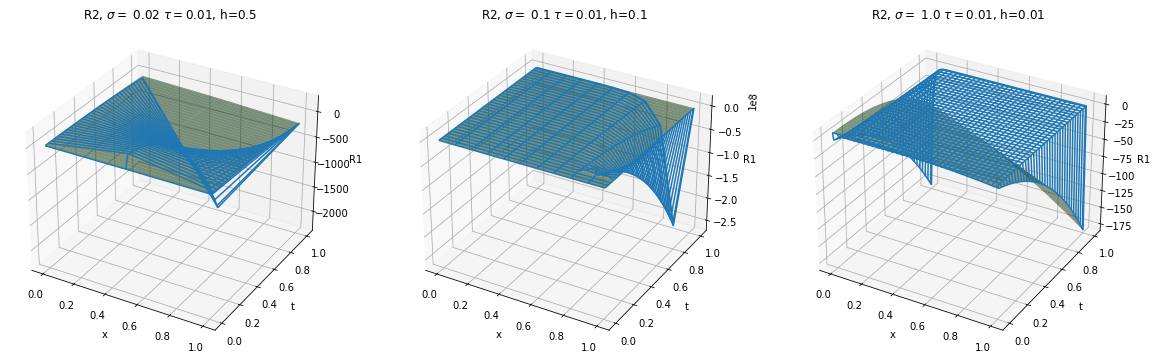

In [11]:
fig = plt.figure(figsize = (20, 6))
tau = 0.01
h = [0.5, 0.1, 0.01]
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    R2 = Landau(-2, R02, h[i], tau)
    x = np.arange(0, L+h[i], h[i])
    t = np.arange(0, T+tau, tau)
    x_, t_ = np.meshgrid(x, t)
    ax.plot_surface(x_, t_, R_th(x_, t_, -2, R02), color = "green", alpha = 0.5)
    ax.plot_wireframe(x_,t_, R2)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel("R1")
    ax.set_title("R2, $\\sigma=$ "+ str(round(tau/h[i], 3))+" $\\tau=$"+str(tau)+", h="+str(h[i]))

#### Расчет инвариантов Римана

sigma =  0.0


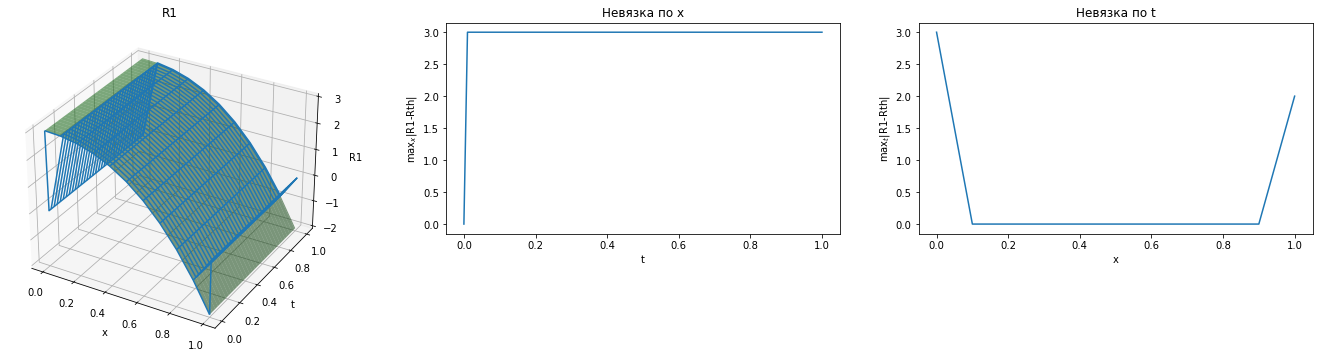

sigma =  0.19999999999999998


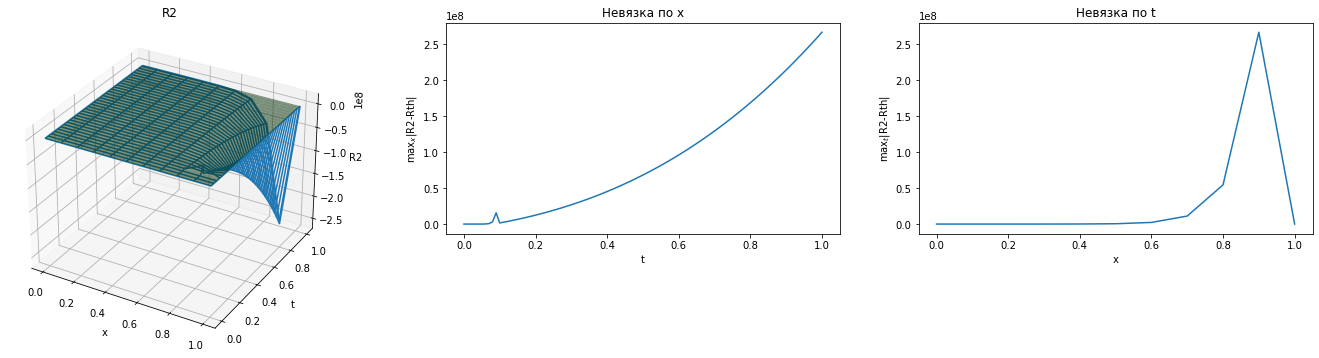

sigma =  0.09999999999999999


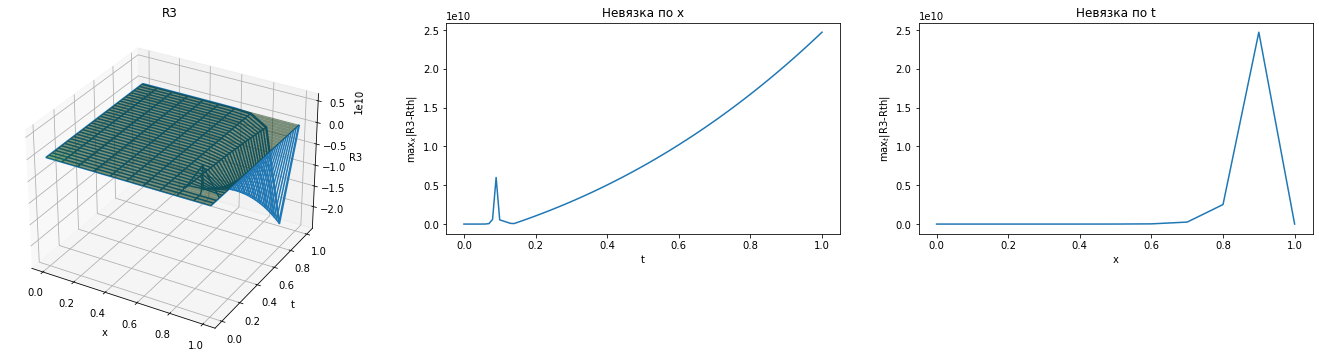

In [12]:
h, tau = 0.1, 0.01
x = np.arange(0, L+h, h)
t = np.arange(0, T+tau, tau)
R1_landau = Landau(0, R01, h, tau)
plot_nev(x, t, R1_landau, "R1", 0, R01)
R2_landau = Landau(-2, R02, h, tau)
plot_nev(x, t, R2_landau, "R2", -2, R02)
R3_landau = Landau(-1, R03, h, tau)
plot_nev(x, t, R3_landau, "R3", -1, R03)

#### Численное решение исходного уравнения


In [13]:
def u(x, t, R1, R2, R3):
    print("tau="+str(round(1/len(t), 4))+", h="+str(round(1/len(x), 3)))
    x_, t_ = np.meshgrid(x, t)
    u_calc = [(2*R1-3*R2+3*R3)/2, (2*R1-2*R2+2*R3)/2, (-4*R1+R2+R3)/2]
    u_th = [(2*R_th(x_, t_, 0, R01)-3*R_th(x_, t_, -2, R02)+3*R_th(x_, t_, -1, R03))/2,
            (2*R_th(x_, t_, 0, R01)-2*R_th(x_, t_, -2, R02)+2*R_th(x_, t_, -1, R03))/2,
            (-4*R_th(x_, t_, 0, R01)+R_th(x_, t_, -2, R02)+R_th(x_, t_, -1, R03))/2]
    nev_t, nev_x = [], []
    for i in range(3):
        fig = plt.figure(figsize = (24, 6))
        gs2 = gridspec.GridSpec(3, 3)
        ax = fig.add_subplot(gs2[:, :1], projection='3d')
        #ax = fig.add_subplot(1, 3, 1, projection='3d')
        ax.plot_surface(x_, t_, u_th[i], color = "green", alpha = 0.5)
        ax.plot_wireframe(x_,t_, u_calc[i])
        ax.set_xlabel("x")
        ax.set_ylabel("t")
        ax.set_zlabel("u"+str(i+1))
        ax = fig.add_subplot(gs2[:2, -2])#fig.add_subplot(1, 3, 2)
        nev_t.append([max(abs(u_calc[i][n]-u_th[i][n])) for n in range(len(t))])
        ax.plot(t, nev_t[-1])
        ax.set_xlabel("t")
        ax.set_ylabel("max$_x|u_{calc}-u_th|$")
        ax.set_title("Невязка по x")
        ax = fig.add_subplot(gs2[:2, -1])#fig.add_subplot(1, 3, 3)
        nev_x.append([max(abs(u_calc[i][:, m]-u_th[i][:, m])) for m in range(len(x))])
        ax.plot(x, nev_x[-1])
        ax.set_xlabel("x")
        ax.set_ylabel("max$_t|u_{calc}-u_th|$")
        ax.set_title("Невязка по t")
    return (nev_t, nev_x)

tau=0.0099, h=0.091


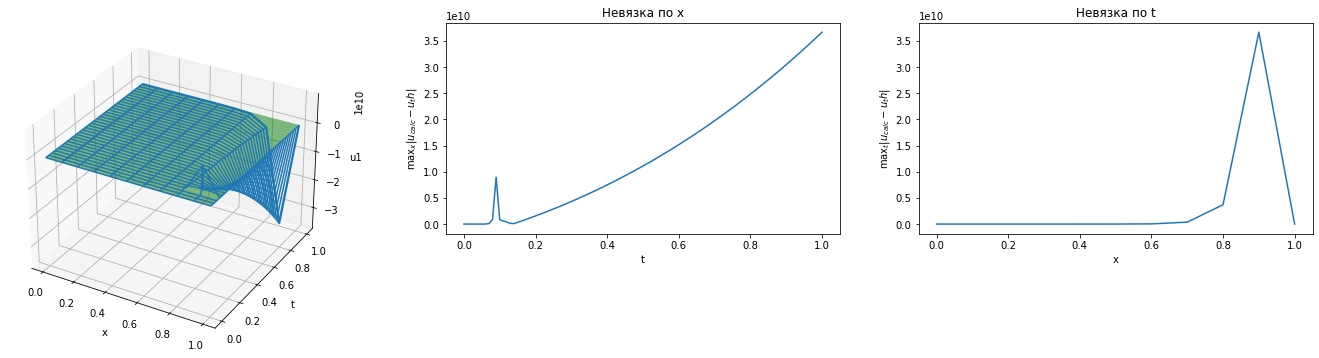

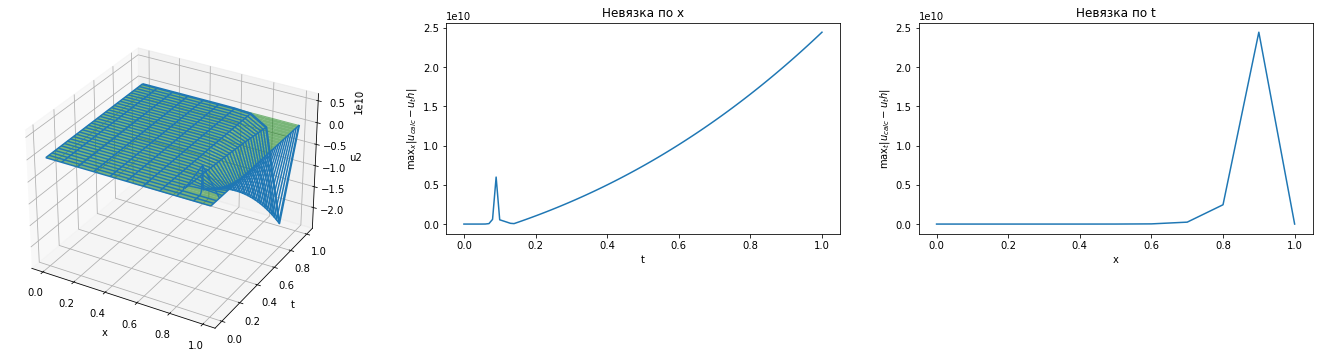

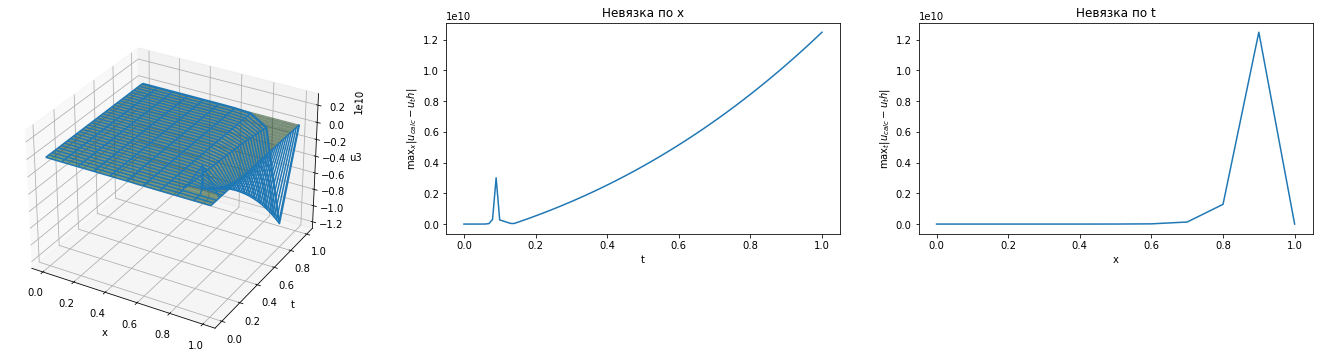

In [14]:
nev_t_landau, nev_x_landau = u(x, t, R1_landau, R2_landau, R3_landau)

## Реализация полностью симметричной разностной схемы ( бегущего счета )


Проанализируем полностью симметричную разностную схему (бегущего счёта). Определим монотонность схемы, порядок аппроксимации и устойчивость.

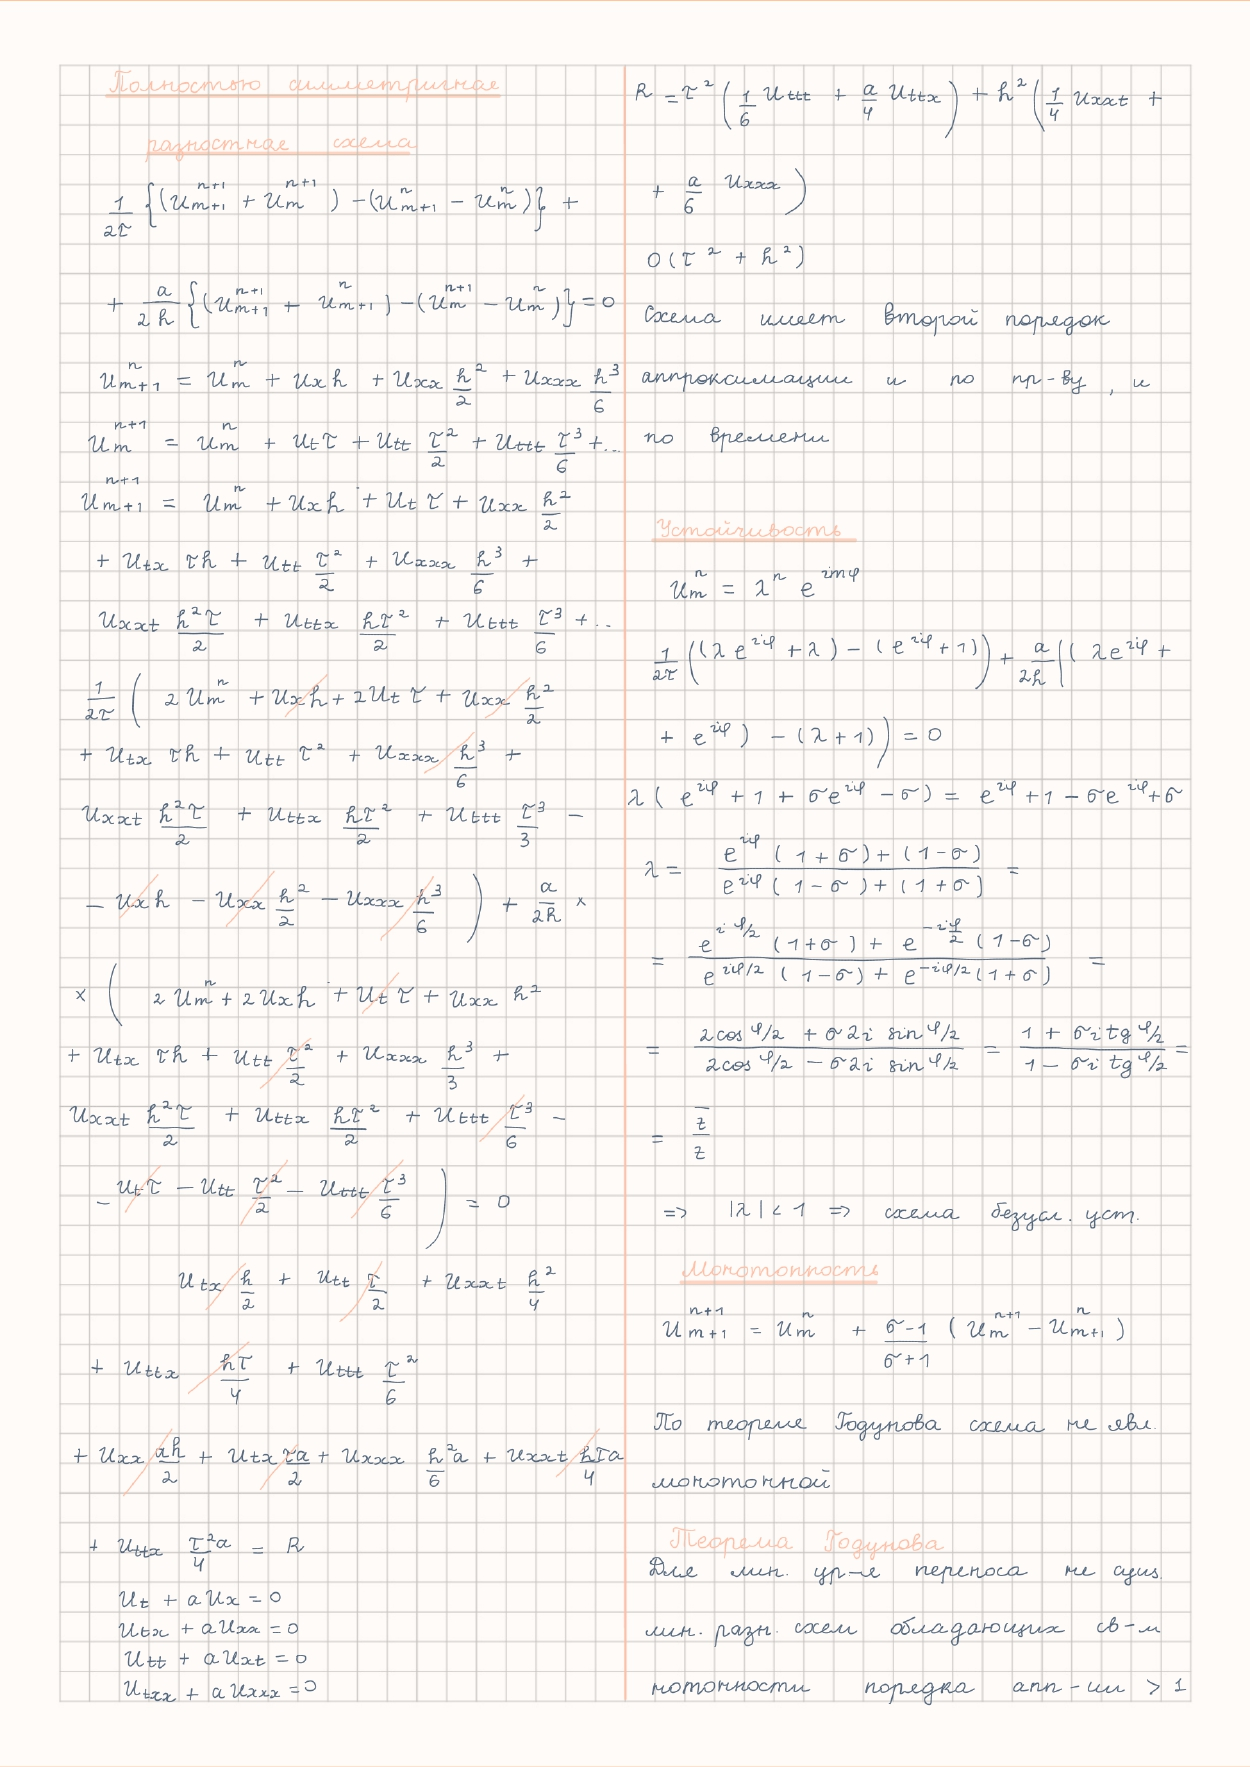

In [15]:
from IPython.display import Image
PATH = "/Users/Yelena/Downloads/"
Image(filename = PATH + "4.jpg", width=800, height=800)

Таким образом, установлено что:

1) Схема имеет второй порядок аппроксимации (подтверждается ПДП). Для схем второго порядка дисперсионная ошибка преобладает над диссипативной; такие схемы не могут быть монотонны по теоремы Годунова.

2) Спектральный признак показал абсолютную устойчивость данного метода, причём для  ∀k,ϕ⇒|λ|=1 .

In [16]:
#функция численного решения по схеме полномтью симметричной

def Symm( a, R0, h, tau):
    sigma= (a*tau/h)
    M, N=int(L/h)+1, int(T/tau)+1
    R = np.zeros(M*N).reshape(N, M)
    R[0, :] = np.array([R0(x) for x in np.arange(0, L+h, h)]).copy()
    for n in range(0, N):
        for m in range(1, M):
            R[n, m] = R[n-1, m-1]+ (R[n-1, m]-R[n, m-1])*(sigma-1)/(1+sigma)
                
    return R
    
   
        

### Подбор параметров сетки

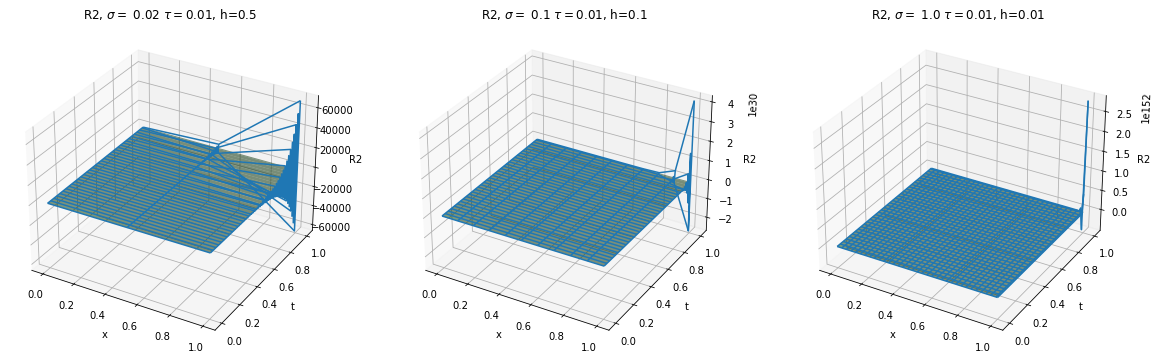

In [17]:
fig = plt.figure(figsize = (20, 6))
tau = 0.01
h = [0.5, 0.1, 0.01]
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    R1 = Symm(-2, R02, h[i], tau)
    x = np.arange(0, L+h[i], h[i])
    t = np.arange(0, T+tau, tau)
    x_, t_ = np.meshgrid(x, t)
    ax.plot_surface(x_, t_, R_th(x_, t_, -2, R02), color = "green", alpha = 0.5)
    ax.plot_wireframe(x_,t_, R1)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel("R2")
    ax.set_title("R2, $\\sigma=$ "+str(round(tau/h[i], 3))+" $\\tau=$"+str(tau)+", h="+str(h[i]))

#### Расчет инвариантов Римана

sigma =  0.0


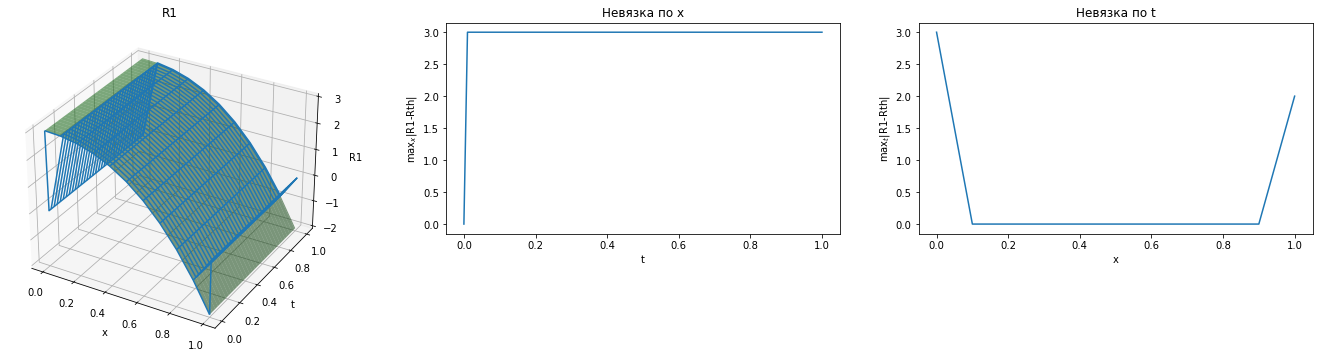

sigma =  0.19999999999999998


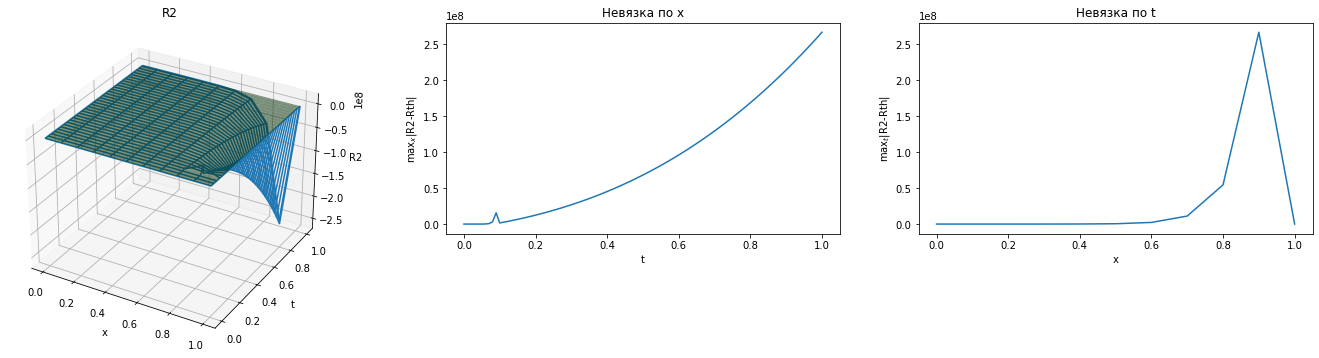

sigma =  0.09999999999999999


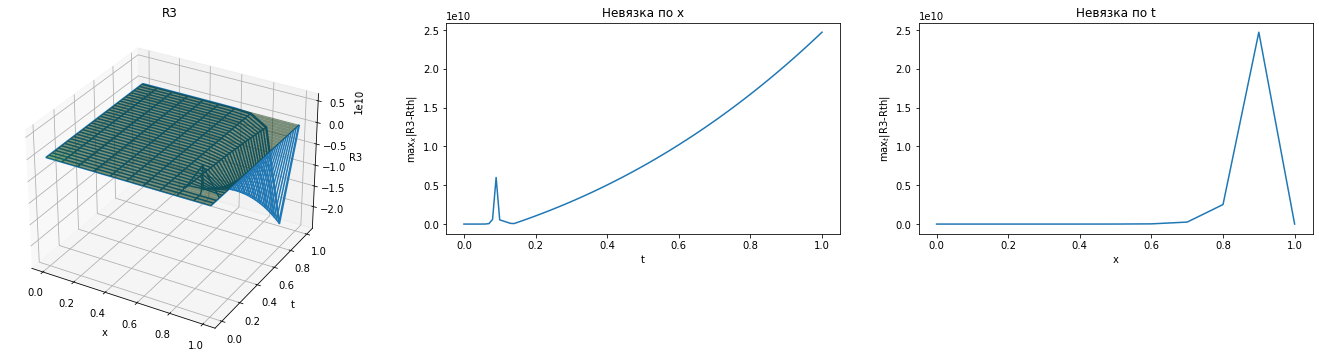

In [18]:
h, tau = 0.1, 0.01
x = np.arange(0, L+h, h)
t = np.arange(0, T+tau, tau)
R1_symm = Symm(0, R01, h, tau)
plot_nev(x, t, R1_landau, "R1", 0, R01)
R2_symm = Symm(-2, R02, h, tau)
plot_nev(x, t, R2_landau, "R2", -2, R02)
R3_symm = Symm(-1, R03, h, tau)
plot_nev(x, t, R3_landau, "R3", -1, R03)

#### Численное решение исходного уравнения

tau=0.0099, h=0.091


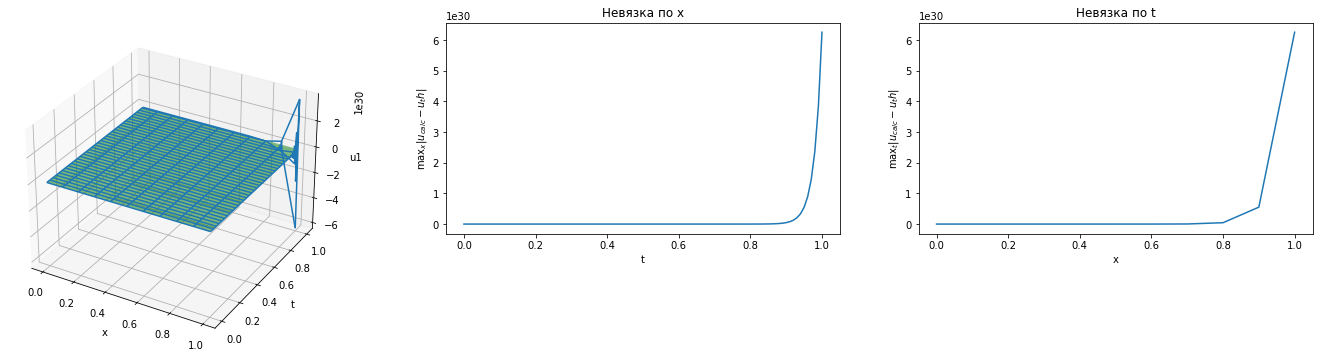

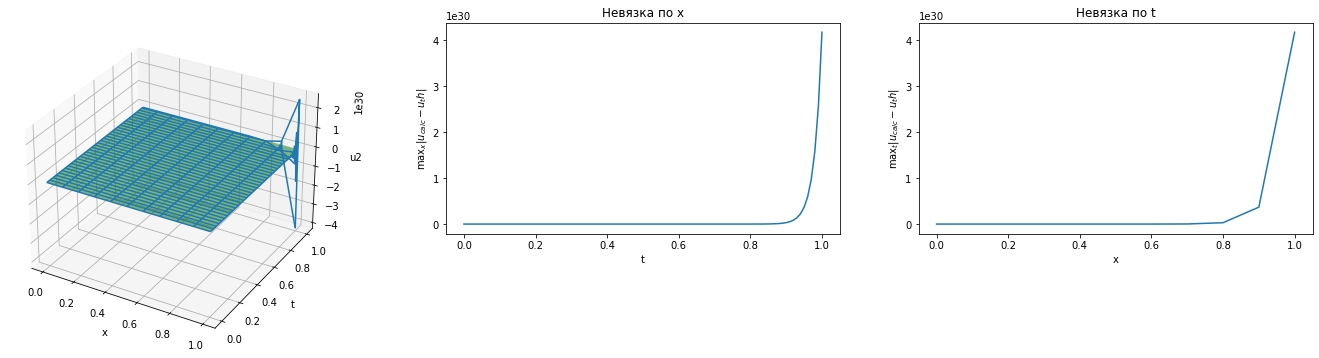

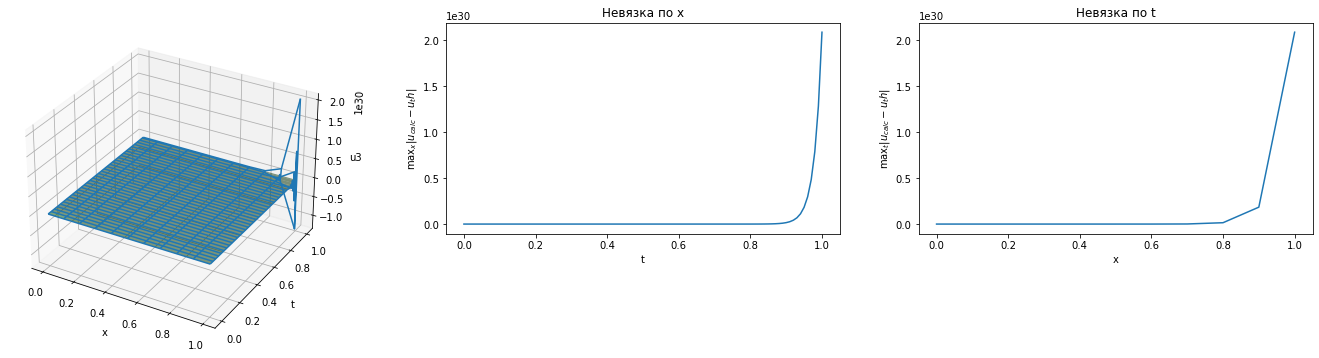

In [19]:
nev_t_symm, nev_x_symm = u(x, t, R1_symm, R2_symm, R3_symm)

Огромную благодарность за помощь в реализации кода выражаю Светлане Забариной! За основу была взята реализация кода Веретененко И. и Забарина С.
